<a href="https://colab.research.google.com/github/Ahibala/Insurance-Premium-Prediction-/blob/main/Part_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2 ( model that predicts binary labels (0 or 1) )

**problem statement :**

Using your code and what you learned in Part 1 above, add on the following:

1) Update the dataset so that the labels are 0 and 1. 

2) Normalize the data

3) Include an activation function - the sigmoid

4) Using the above updates, create code that can successfully predict the label as 0 or 1. 

## Step 1: Import required libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 2: Update the dataset

 update the dataset so that the labels are 0 or 1.

In [24]:
# Input features (x1, x2)
X = np.array([[1, 1],
              [2, 3],
              [3, 1],
              [4, 2]])

# Output (y) as binary labels
y = np.array([0, 0, 1, 1])


data = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': y})

data

,x1,x2,y
0,1,1,0
1,2,3,0
2,3,1,1
3,4,2,1


## Step 3: Normalize the data

In [25]:
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
X

array([[0.        , 0.        ],
       [0.33333333, 1.        ],
       [0.66666667, 0.        ],
       [1.        , 0.5       ]])

## Step 4: Initialize the required variables

In [26]:
# Initialize weight vector W (w1, w2) and bias b
W = np.random.rand(2)
b = np.random.rand()

# Set learning rate and number of epochs
learning_rate = 0.1
epochs = 1000

## Step 5: Define the sigmoid activation function

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Step 6: Define the linear  regression equation and loss function

In [29]:
def linear_regression(X, W, b):
    linear_output = np.dot(X, W) + b
    return sigmoid(linear_output)

def loss_function(y_hat, y):
    return (1 / (2 * len(y))) * np.sum((y_hat - y) ** 2)

## Step 7: Perform gradient descent

In [30]:
n = len(y) # Number of data points

for epoch in range(epochs):
    # Compute predictions (y_hat) using the logistic regression equation
    y_hat = linear_regression (X, W, b)

    # Compute the gradients of the loss function with respect to W and b
    dW = (1 / n) * np.dot((y_hat - y), X)
    db = (1 / n) * np.sum(y_hat - y)

    # Update W and b using the gradients and learning rate
    W -= learning_rate * dW
    b -= learning_rate * db

    # Compute the loss after the update
    loss = loss_function(y_hat, y)

    # Print the loss for every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 0.15570435107175495
Epoch 100, Loss: 0.07127689883137175
Epoch 200, Loss: 0.04270757466694246
Epoch 300, Loss: 0.02780505876990792
Epoch 400, Loss: 0.019343376529041185
Epoch 500, Loss: 0.01416206914780215
Epoch 600, Loss: 0.010786989684791845
Epoch 700, Loss: 0.008476673962865118
Epoch 800, Loss: 0.006830575786922975
Epoch 900, Loss: 0.005618611472076695


## Step 8: Print the final values of W and b

In [31]:
print("Final W:", W)
print("Final b:", b)

Final W: [ 6.00316965 -2.61601211]
Final b: -1.907184365514483


## Step 9: function to predict binary labels

In [32]:
def predict(X, W, b, threshold=0.5):
    y_hat = linear_regression(X, W, b)
    return (y_hat > threshold).astype(int)

## Step 10: Test the model

In [33]:
y_pred = predict(X, W, b)
print("Predicted labels:", y_pred)

Predicted labels: [0 0 1 1]


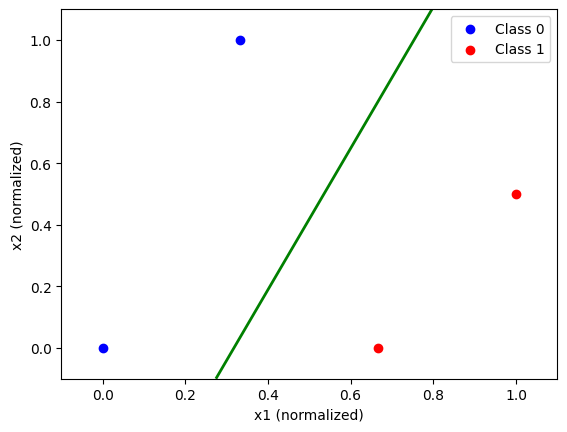

Accuracy: 100.00%


In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def plot_data_and_decision_boundary(X, y, W, b):
    X = X
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                         np.linspace(x2_min, x2_max, 100))

    Z = sigmoid(W[0] * x1 + W[1] * x2 + b)
    Z = Z.reshape(x1.shape)

    plt.contour(x1, x2, Z, levels=[0.5], colors='green', linewidths=2)
    plt.xlabel('x1 (normalized)')
    plt.ylabel('x2 (normalized)')
    plt.legend()
    plt.show()

# Visualize the dataset and decision boundary
plot_data_and_decision_boundary(X, y, W, b)

# Compute the accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
